In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
import statsmodels.api as sm


In [2]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [5]:
from imblearn.over_sampling import SMOTE

In [6]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from mlxtend import plotting
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

%matplotlib inline

In [7]:

from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, roc_auc_score#, plot_roc_curve

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.svm import SVC

In [8]:
# id                    Unique Identifier for each Asteroid
# name                  Name given by NASA
# est_diameter_min      Minimum Estimated Diameter in Kilometres
# est_diameter_max      Maximum Estimated Diameter in Kilometres
# relative_velocity     Velocity Relative to Earth
# miss_distance         Distance in Kilometres missed
# orbiting_body         Planet that the asteroid orbits (Earth)
# sentry_object         Included in sentry - an automated collision monitoring system
# absolute_magnitude    Describes intrinsic luminosity
# hazardous             Boolean feature that shows whether asteroid is harmful or not

In [9]:
# wczytanie danych z pliku csv
df_rough = pd.read_csv("neo_v2.csv")

In [10]:
df_rough.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [11]:
df_rough.shape

(90836, 10)

In [12]:
df_rough.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [13]:
df_rough.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [14]:
# sprawdzenie czy sa wartosci null
df_rough.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [15]:
# sprawdzenie czy są duplikaty
df_rough.duplicated().any()

False

In [16]:
# sprawdzenie czy są duplikaty w kolumnie "name"
df_rough["name"].duplicated().any()

True

In [17]:
# duplikaty i ich liczba
duplicates_counts = df_rough[df_rough.duplicated(subset=['id'], keep=False)]['id'].value_counts()
duplicates_counts


id
2277810    43
2469219    43
3743123    40
2138175    39
3893865    38
           ..
2518678     2
2494658     2
3441842     2
3746624     2
2523607     2
Name: count, Length: 15902, dtype: int64

In [18]:
# sprawdzenie tych rekordow z id = 2277810
df_rough[df_rough["id"] == 2277810]

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
775,2277810,277810 (2006 FV35),0.119277,0.26671,33392.787810,4.688109e+07,Earth,False,21.74,False
1553,2277810,277810 (2006 FV35),0.119277,0.26671,41041.253668,5.061035e+07,Earth,False,21.74,False
3822,2277810,277810 (2006 FV35),0.119277,0.26671,33603.086222,4.726815e+07,Earth,False,21.74,False
4613,2277810,277810 (2006 FV35),0.119277,0.26671,41639.993637,5.090111e+07,Earth,False,21.74,False
6754,2277810,277810 (2006 FV35),0.119277,0.26671,33690.425696,4.770028e+07,Earth,False,21.74,False
7559,2277810,277810 (2006 FV35),0.119277,0.26671,42094.887535,5.123005e+07,Earth,False,21.74,False
9853,2277810,277810 (2006 FV35),0.119277,0.26671,33854.071534,4.811115e+07,Earth,False,21.74,False
10732,2277810,277810 (2006 FV35),0.119277,0.26671,42697.367534,5.153267e+07,Earth,False,21.74,False
13096,2277810,277810 (2006 FV35),0.119277,0.26671,34093.187548,4.862404e+07,Earth,False,21.74,False
13921,2277810,277810 (2006 FV35),0.119277,0.26671,43317.243030,5.188678e+07,Earth,False,21.74,False


In [19]:
# pozbycie sie rekordów z duplikatem nazwy
# df_no_duplicates = df_rough.drop_duplicates(subset=['name'], keep=False)

In [20]:
# przypisanie przygotowanej ramki do nowej ramki
df = df_rough

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


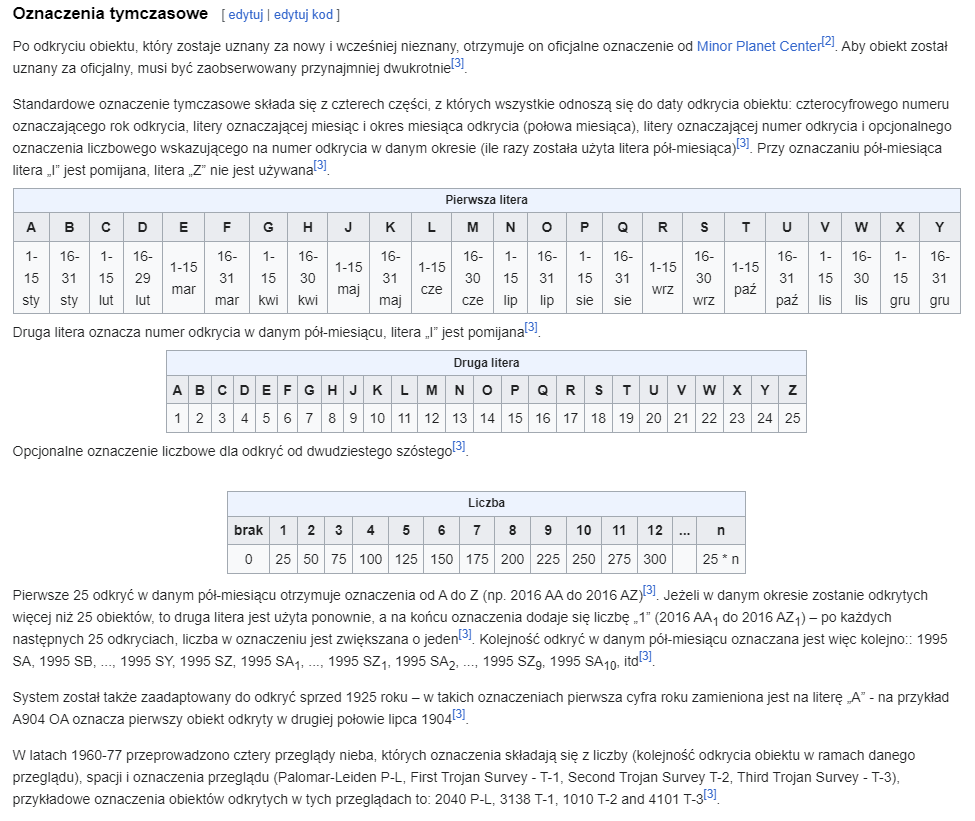

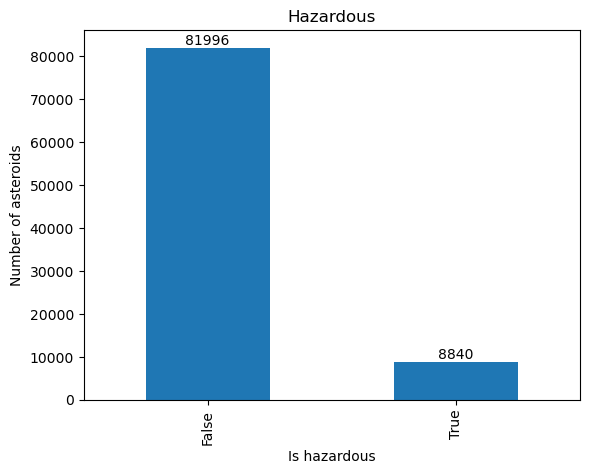

In [22]:
df.hazardous.value_counts().plot(kind='bar')
plt.xlabel('Is hazardous')
plt.ylabel('Number of asteroids')
plt.title('Hazardous')

for index, value in enumerate(df_rough.hazardous.value_counts()):
    plt.annotate(str(value), xy=(index, value + 20), ha='center', va='bottom', rotation=0)


plt.show()





PHO definition from NASA

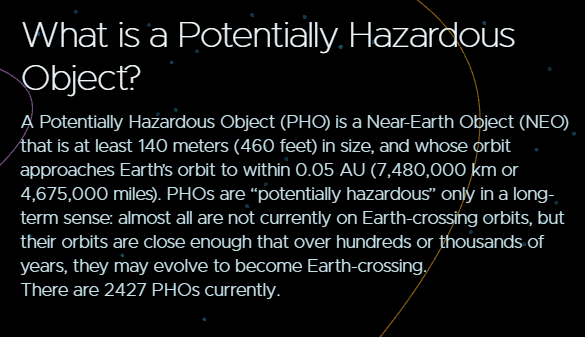

In [23]:
df.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [24]:
df_names = df["name"].tolist()
df_names

['162635 (2000 SS164)',
 '277475 (2005 WK4)',
 '512244 (2015 YE18)',
 '(2012 BV13)',
 '(2014 GE35)',
 '(2021 GY23)',
 '(2021 PY40)',
 '(2021 XD6)',
 '88213 (2001 AF2)',
 '(2016 YM)',
 '(2020 OT6)',
 '(2020 XW4)',
 '(2021 AW1)',
 '(2022 AM)',
 '198752 (2005 EA60)',
 '(2000 YT134)',
 '(2016 AF2)',
 '(2017 YU3)',
 '(2018 AN2)',
 '(2018 LC3)',
 '(2018 VK1)',
 '(2019 KN2)',
 '(2020 RD4)',
 '506491 (2003 UW29)',
 '(2006 GB1)',
 '(2013 AU27)',
 '(2017 CQ)',
 '(2017 RV)',
 '(2020 UF5)',
 '(2021 AZ4)',
 '(2022 AB)',
 '7480 Norwan (1994 PC)',
 '20425 (1998 VD35)',
 '337345 (2001 KO20)',
 '(2012 RO1)',
 '(2013 XS3)',
 '(2020 GF1)',
 '(2022 AP1)',
 '2100 Ra-Shalom (1978 RA)',
 '3362 Khufu (1984 QA)',
 '4688 (1980 WF)',
 '252558 (2001 WT1)',
 '452334 (2001 LB)',
 '(2000 YS134)',
 '(2006 BV39)',
 '(2007 NL1)',
 '(2009 LW2)',
 '(2011 OB)',
 '(2015 UK)',
 '(2016 BN1)',
 '(2020 AN3)',
 '85182 (1991 AQ)',
 '(2007 WM3)',
 '(2013 AJ91)',
 '(2017 YP1)',
 '(2021 LW3)',
 '(2011 CL50)',
 '(2014 BF3)',
 '(2020

In [25]:
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [26]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [27]:
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.20,2.68,13569.25,54839744.08,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.27,0.59,73588.73,61438126.52,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.72,1.61,114258.69,49798724.94,Earth,False,17.83,False
3,3596030,(2012 BV13),0.10,0.22,24764.30,25434972.72,Earth,False,22.20,False
4,3667127,(2014 GE35),0.26,0.57,42737.73,46275567.00,Earth,False,20.09,True


In [28]:
ast = df.drop(['id', 'name', 'orbiting_body', 'sentry_object'], axis=1)


In [29]:
ast.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.20,2.68,13569.25,54839744.08,16.73,False
1,0.27,0.59,73588.73,61438126.52,20.00,True
2,0.72,1.61,114258.69,49798724.94,17.83,False
3,0.10,0.22,24764.30,25434972.72,22.20,False
4,0.26,0.57,42737.73,46275567.00,20.09,True


In [30]:
ast.shape

(90836, 6)

In [31]:
alphabet = {}
splited2 = []
dates = []
counter = []
dup = []
for i in df_names:
    j = i.split()
    for k in j:
        if k.startswith("("):
            k = k[1:]
            splited2.append(k)
        elif k.endswith(")"):
            l = k[0]
            dates.append(l)
            m = k[1]
            counter.append(m)
            n = k[2:-1]
            # if not k[2:-1]:
            #     n = 0
            # else:
            #     n = int(k[2:-1])
            dup.append(n)

In [32]:
dates_dict = {
    'A' = 'January',
    'B' = 'January',
    'C' = 'February',
    'D' = 'February',
    'E' = 'March',
    'F' = 'March',
    'G' = 'April',
    'H' = 'April',
    'J' = 'Mai',
    'K' = 'Mai',
    'L' = 'June',
    'M' = 'June',
    'N' = 'July',
    'O' = 'July',
    'P' = 'August',
    'Q' = 'August',
    'R' = 'September',
    'S' = 'September',
    'T' = 'October',
    'U' = 'October',
    'V' = 'November',
    'W' = 'November',
    'X' = 'December',
    'Y' = 'December'
}

SyntaxError: cannot assign to literal here. Maybe you meant '==' instead of '='? (1056186057.py, line 2)

In [ ]:
counter_dict = {
    'A' = 1,
    'B' = 2,
    'C' = 3,
    'D' = 4,
    'E' = 5,
    'F' = 6,
    'G' = 7,
    'H' = 8,
    'J' = 9,
    'K' = 10,
    'L' = 11,
    'M' = 12,
    'N' = 13,
    'O' = 14,
    'P' = 15,
    'Q' = 16,
    'R' = 17,
    'S' = 18,
    'T' = 19,
    'U' = 20,
    'V' = 21,
    'W' = 22,
    'X' = 23,
    'Y' = 24,
    'Z' = 25
}

SyntaxError: cannot assign to literal here. Maybe you meant '==' instead of '='? (649387198.py, line 2)

In [ ]:
dates

['S',
 'W',
 'Y',
 'B',
 'G',
 'G',
 'P',
 'X',
 'A',
 'Y',
 'O',
 'X',
 'A',
 'A',
 'E',
 'Y',
 'A',
 'Y',
 'A',
 'L',
 'V',
 'K',
 'R',
 'U',
 'G',
 'A',
 'C',
 'R',
 'U',
 'A',
 'A',
 'P',
 'V',
 'K',
 'R',
 'X',
 'G',
 'A',
 'R',
 'Q',
 'W',
 'W',
 'L',
 'Y',
 'B',
 'N',
 'L',
 'O',
 'U',
 'B',
 'A',
 'A',
 'W',
 'A',
 'Y',
 'L',
 'C',
 'B',
 'F',
 'G',
 'Y',
 'B',
 'A',
 'M',
 'K',
 'W',
 'C',
 'D',
 'C',
 'M',
 'T',
 'B',
 'U',
 'R',
 'J',
 'D',
 'X',
 'A',
 'Y',
 'S',
 'B',
 'B',
 'M',
 'W',
 'K',
 'Y',
 'A',
 'F',
 'Y',
 'Y',
 'B',
 'A',
 'A',
 'G',
 'J',
 'T',
 'C',
 'X',
 'C',
 'K',
 'O',
 'J',
 'B',
 'Y',
 'Q',
 'C',
 'Y',
 'A',
 'W',
 'B',
 'S',
 'X',
 'B',
 'B',
 'P',
 'E',
 'E',
 'F',
 'J',
 'A',
 'B',
 'A',
 'W',
 'Y',
 'W',
 'V',
 'T',
 'C',
 'M',
 'G',
 'A',
 'G',
 'Q',
 'R',
 'R',
 'A',
 'B',
 'C',
 'A',
 'C',
 'E',
 'C',
 'D',
 'R',
 'B',
 'B',
 'J',
 'F',
 'H',
 'Y',
 'E',
 'A',
 'N',
 'L',
 'A',
 'W',
 'Q',
 'G',
 'X',
 'Y',
 'A',
 'B',
 'B',
 'B',
 'X',
 'O',
 'B'

In [ ]:
counter

['S',
 'K',
 'E',
 'V',
 'E',
 'Y',
 'Y',
 'D',
 'F',
 'M',
 'T',
 'W',
 'W',
 'M',
 'A',
 'T',
 'F',
 'U',
 'N',
 'C',
 'K',
 'N',
 'D',
 'W',
 'B',
 'U',
 'Q',
 'V',
 'F',
 'Z',
 'B',
 'C',
 'D',
 'O',
 'O',
 'S',
 'F',
 'P',
 'A',
 'A',
 'F',
 'T',
 'B',
 'S',
 'V',
 'L',
 'W',
 'B',
 'K',
 'N',
 'N',
 'Q',
 'M',
 'J',
 'P',
 'W',
 'L',
 'F',
 'G',
 'S',
 'J',
 'K',
 'J',
 'Z',
 'B',
 'R',
 'K',
 'E',
 'P',
 'P',
 'O',
 'C',
 'S',
 'F',
 'U',
 'G',
 'K',
 'E',
 'M',
 'D',
 'E',
 'P',
 'R',
 'P',
 'P',
 'L',
 'G',
 'Y',
 'K',
 'K',
 'B',
 'A',
 'B',
 'K',
 'E',
 'D',
 'W',
 'D',
 'V',
 'Z',
 'T',
 'E',
 'D',
 'M',
 'K',
 'W',
 'W',
 'X',
 'K',
 'A',
 'E',
 'Y',
 'A',
 'N',
 'C',
 'N',
 'J',
 'A',
 'M',
 'V',
 'E',
 'V',
 'R',
 'O',
 'K',
 'A',
 'C',
 'C',
 'E',
 'R',
 'G',
 'F',
 'Y',
 'P',
 'S',
 'K',
 'C',
 'A',
 'O',
 'N',
 'Y',
 'W',
 'Q',
 'N',
 'B',
 'O',
 'V',
 'J',
 'V',
 'K',
 'L',
 'B',
 'S',
 'H',
 'G',
 'R',
 'N',
 'E',
 'E',
 'B',
 'W',
 'M',
 'A',
 'P',
 'X',
 'Y',
 'P'

In [ ]:
dup

['164',
 '4',
 '18',
 '13',
 '35',
 '23',
 '40',
 '6',
 '2',
 '',
 '6',
 '4',
 '1',
 '',
 '60',
 '134',
 '2',
 '3',
 '2',
 '3',
 '1',
 '2',
 '4',
 '29',
 '1',
 '27',
 '',
 '',
 '5',
 '4',
 '',
 '',
 '35',
 '20',
 '1',
 '3',
 '1',
 '1',
 '',
 '',
 '',
 '1',
 '',
 '134',
 '39',
 '1',
 '2',
 '',
 '',
 '1',
 '3',
 '',
 '3',
 '91',
 '1',
 '3',
 '50',
 '3',
 '15',
 '12',
 '29',
 '11',
 '165',
 '2',
 '7',
 '1',
 '33',
 '47',
 '4',
 '',
 '139',
 '70',
 '3',
 '11',
 '28',
 '',
 '47',
 '2',
 '29',
 '15',
 '10',
 '',
 '5',
 '362',
 '7',
 '2',
 '1',
 '',
 '29',
 '4',
 '16',
 '29',
 '',
 '20',
 '9',
 '17',
 '1',
 '',
 '13',
 '2',
 '4',
 '9',
 '16',
 '56',
 '362',
 '137',
 '3',
 '3',
 '5',
 '',
 '45',
 '378',
 '16',
 '61',
 '228',
 '156',
 '4',
 '3',
 '1',
 '2',
 '',
 '2',
 '127',
 '',
 '15',
 '2',
 '15',
 '1',
 '1',
 '75',
 '193',
 '216',
 '16',
 '8',
 '9',
 '8',
 '',
 '',
 '10',
 '1',
 '1',
 '1',
 '8',
 '77',
 '40',
 '60',
 '14',
 '3',
 '2',
 '3',
 '20',
 '12',
 '',
 '',
 '',
 '12',
 '1',
 '3',
 '

In [ ]:
months_count = Counter(dates)
months_count

NameError: name 'Counter' is not defined

In [ ]:
# months_count['A'] + months_count['B']

In [ ]:
new_dict = {
    'January': months_count['A'] + months_count['B'],
    'February': months_count['C'] + months_count['D'],
    'March': months_count['E'] + months_count['F'],
    'April': months_count['G'] + months_count['H'],
    'May': months_count['J'] + months_count['K'],
    'June': months_count['L'] + months_count['M'],
    'July': months_count['N'] + months_count['O'],
    'August': months_count['P'] + months_count['Q'],
    'September': months_count['R'] + months_count['S'],
    'October': months_count['T'] + months_count['U'],
    'November': months_count['V'] + months_count['W'],
    'December': months_count['X'] + months_count['Y']
}

NameError: name 'months_count' is not defined

In [ ]:
test7 = pd.DataFrame([new_dict])
test7 = test7.T
test7 = test7.reset_index()
test7.columns = ["Month", "Num_of_asteroids"]

NameError: name 'new_dict' is not defined

In [ ]:
test7

NameError: name 'test7' is not defined

In [ ]:
test7.columns = ["Month", "Num_of_asteroids"]

In [ ]:
test7

NameError: name 'test7' is not defined

In [ ]:
plt.figure(figsize=(15,10))

cols = ['grey' if (x < np.mean(test7['Num_of_asteroids'])) else 'black' for x in test7["Num_of_asteroids"]]

months = sns.barplot(data=test7, x='Month', y='Num_of_asteroids', palette=cols)
months.tick_params(axis='x', rotation=90)


mean_value = sum(test7['Num_of_asteroids']) / len(test7['Num_of_asteroids'])
plt.axhline(y=mean_value, color='b', linestyle='--', label='Mean')
plt.text(5, mean_value +25, mean_value, color='b', ha='center')

plt.title('Number of asteroids discovered/registered by month')
plt.xlabel('Month')
plt.ylabel('Number of asteroids')

plt.legend()

for index, value in enumerate(test7['Num_of_asteroids']):
    plt.annotate(str(value), xy=(index, value + 20), ha='center', va='bottom', rotation=90)


NameError: name 'test7' is not defined

<Figure size 1500x1000 with 0 Axes>

In [ ]:
dup_count = Counter(dup)
dup_count

Counter({'': 4017,
         '1': 2947,
         '2': 2410,
         '3': 2006,
         '4': 1487,
         '5': 1407,
         '6': 1091,
         '7': 780,
         '8': 563,
         '9': 468,
         '10': 465,
         '11': 358,
         '13': 334,
         '14': 316,
         '15': 294,
         '12': 266,
         '19': 238,
         '17': 234,
         '16': 225,
         '20': 209,
         '18': 180,
         '21': 171,
         '32': 156,
         '22': 152,
         '33': 141,
         '35': 137,
         '24': 136,
         '26': 135,
         '25': 131,
         '29': 118,
         '55': 117,
         '34': 112,
         '44': 111,
         '23': 109,
         '28': 108,
         '45': 108,
         '30': 105,
         '27': 100,
         '43': 97,
         '36': 91,
         '31': 90,
         '56': 87,
         '39': 86,
         '40': 83,
         '64': 81,
         '57': 77,
         '68': 74,
         '38': 73,
         '41': 70,
         '60': 65,
         '49': 6

In [ ]:
splited2

['2000',
 '2005',
 '2015',
 '2012',
 '2014',
 '2021',
 '2021',
 '2021',
 '2001',
 '2016',
 '2020',
 '2020',
 '2021',
 '2022',
 '2005',
 '2000',
 '2016',
 '2017',
 '2018',
 '2018',
 '2018',
 '2019',
 '2020',
 '2003',
 '2006',
 '2013',
 '2017',
 '2017',
 '2020',
 '2021',
 '2022',
 '1994',
 '1998',
 '2001',
 '2012',
 '2013',
 '2020',
 '2022',
 '1978',
 '1984',
 '1980',
 '2001',
 '2001',
 '2000',
 '2006',
 '2007',
 '2009',
 '2011',
 '2015',
 '2016',
 '2020',
 '1991',
 '2007',
 '2013',
 '2017',
 '2021',
 '2011',
 '2014',
 '2020',
 '2021',
 '2000',
 '2004',
 '2016',
 '2017',
 '2020',
 '2020',
 '2000',
 '2001',
 '2011',
 '2012',
 '2012',
 '2013',
 '2013',
 '2014',
 '2016',
 '2022',
 '2000',
 '2001',
 '2000',
 '1998',
 '2001',
 '2014',
 '2014',
 '2014',
 '2020',
 '2020',
 '2021',
 '2022',
 '2000',
 '2000',
 '2001',
 '2002',
 '2014',
 '2019',
 '2002',
 '2009',
 '2017',
 '2017',
 '2018',
 '2019',
 '2020',
 '2002',
 '2001',
 '2007',
 '2014',
 '2016',
 '2017',
 '2018',
 '2019',
 '2022',
 '2000',
 

In [ ]:
splited

['2021',
 '2017',
 '2013',
 '2020',
 '2021',
 '2021',
 '2017',
 '2000',
 '2007',
 '2013',
 '2021',
 '2019',
 '1997',
 '2015',
 '2021',
 '2015',
 '2020',
 '2016',
 '2012',
 '2015',
 '2021',
 '2018',
 '2020',
 '2004',
 '2019',
 '2019',
 '2013',
 '2020',
 '2007',
 '2009',
 '2021',
 '2018',
 '2015',
 '2019',
 '2000',
 '2015',
 '2021',
 '2021',
 '2008',
 '2013',
 '2015',
 '2020',
 '2020',
 '2021',
 '2012',
 '2020',
 '2019',
 '2020',
 '2013',
 '2021',
 '2013',
 '2010',
 '2020',
 '2017',
 '2005',
 '2019',
 '2021',
 '2022',
 '2020',
 '2016',
 '2020',
 '2017',
 '2013',
 '2021',
 '2021',
 '2015',
 '2014',
 '2000',
 '2017',
 '2019',
 '2020',
 '2018',
 '2018',
 '2012',
 '2021',
 '1975',
 '2018',
 '2020',
 '2014',
 '2022',
 '2019',
 '2015',
 '2017',
 '2018',
 '2019',
 '2010',
 '2009',
 '2015',
 '2015',
 '2021',
 '2011',
 '2020',
 '2015',
 '2002',
 '2014',
 '2018',
 '2017',
 '2009',
 '2020',
 '2020',
 '2018',
 '2012',
 '2012',
 '1999',
 '2022',
 '2021',
 '2001',
 '2019',
 '2019',
 '2019',
 '2020',
 

In [ ]:
# ['A911', 'A898', 'A924', 'A/2019']
new_list = []
for date in splited2:
    if date == 'A911':
        date = '1911'
        new_list.append(date)
    elif date == 'A898':
        date = '1898'
        new_list.append(date)
    elif date == 'A924':
        date = '1924'
        new_list.append(date)
    elif date == 'A/2019':
        date = '2019'
        new_list.append(date)
    else:
        new_list.append(date)

In [ ]:
new_list

['2000',
 '2005',
 '2015',
 '2012',
 '2014',
 '2021',
 '2021',
 '2021',
 '2001',
 '2016',
 '2020',
 '2020',
 '2021',
 '2022',
 '2005',
 '2000',
 '2016',
 '2017',
 '2018',
 '2018',
 '2018',
 '2019',
 '2020',
 '2003',
 '2006',
 '2013',
 '2017',
 '2017',
 '2020',
 '2021',
 '2022',
 '1994',
 '1998',
 '2001',
 '2012',
 '2013',
 '2020',
 '2022',
 '1978',
 '1984',
 '1980',
 '2001',
 '2001',
 '2000',
 '2006',
 '2007',
 '2009',
 '2011',
 '2015',
 '2016',
 '2020',
 '1991',
 '2007',
 '2013',
 '2017',
 '2021',
 '2011',
 '2014',
 '2020',
 '2021',
 '2000',
 '2004',
 '2016',
 '2017',
 '2020',
 '2020',
 '2000',
 '2001',
 '2011',
 '2012',
 '2012',
 '2013',
 '2013',
 '2014',
 '2016',
 '2022',
 '2000',
 '2001',
 '2000',
 '1998',
 '2001',
 '2014',
 '2014',
 '2014',
 '2020',
 '2020',
 '2021',
 '2022',
 '2000',
 '2000',
 '2001',
 '2002',
 '2014',
 '2019',
 '2002',
 '2009',
 '2017',
 '2017',
 '2018',
 '2019',
 '2020',
 '2002',
 '2001',
 '2007',
 '2014',
 '2016',
 '2017',
 '2018',
 '2019',
 '2022',
 '2000',
 

In [ ]:
splited2

['2000',
 '2005',
 '2015',
 '2012',
 '2014',
 '2021',
 '2021',
 '2021',
 '2001',
 '2016',
 '2020',
 '2020',
 '2021',
 '2022',
 '2005',
 '2000',
 '2016',
 '2017',
 '2018',
 '2018',
 '2018',
 '2019',
 '2020',
 '2003',
 '2006',
 '2013',
 '2017',
 '2017',
 '2020',
 '2021',
 '2022',
 '1994',
 '1998',
 '2001',
 '2012',
 '2013',
 '2020',
 '2022',
 '1978',
 '1984',
 '1980',
 '2001',
 '2001',
 '2000',
 '2006',
 '2007',
 '2009',
 '2011',
 '2015',
 '2016',
 '2020',
 '1991',
 '2007',
 '2013',
 '2017',
 '2021',
 '2011',
 '2014',
 '2020',
 '2021',
 '2000',
 '2004',
 '2016',
 '2017',
 '2020',
 '2020',
 '2000',
 '2001',
 '2011',
 '2012',
 '2012',
 '2013',
 '2013',
 '2014',
 '2016',
 '2022',
 '2000',
 '2001',
 '2000',
 '1998',
 '2001',
 '2014',
 '2014',
 '2014',
 '2020',
 '2020',
 '2021',
 '2022',
 '2000',
 '2000',
 '2001',
 '2002',
 '2014',
 '2019',
 '2002',
 '2009',
 '2017',
 '2017',
 '2018',
 '2019',
 '2020',
 '2002',
 '2001',
 '2007',
 '2014',
 '2016',
 '2017',
 '2018',
 '2019',
 '2022',
 '2000',
 

In [ ]:
years2 = Counter(new_list)

In [ ]:
years2

Counter({'2021': 2999,
         '2020': 2884,
         '2019': 2344,
         '2017': 1976,
         '2016': 1791,
         '2018': 1772,
         '2015': 1488,
         '2014': 1384,
         '2013': 987,
         '2012': 960,
         '2022': 922,
         '2010': 873,
         '2011': 846,
         '2008': 782,
         '2009': 751,
         '2006': 628,
         '2007': 620,
         '2005': 614,
         '2004': 522,
         '2002': 488,
         '2001': 431,
         '2003': 422,
         '2000': 275,
         '1999': 185,
         '1998': 155,
         '1997': 38,
         '1991': 33,
         '1996': 30,
         '1994': 29,
         '1993': 29,
         '1992': 23,
         '1990': 19,
         '1995': 17,
         '1989': 15,
         '1987': 10,
         '1988': 9,
         '1986': 6,
         '1982': 6,
         '1983': 5,
         '1984': 4,
         '1985': 4,
         '1978': 3,
         '1980': 3,
         '1950': 3,
         '1976': 3,
         '1973': 3,
         '19

In [ ]:
# drop ['6743', '4788', '6344']
years2 = {k:v for k,v in years2.items() if k != '6743' or k != '4788' or k != '6344'}

In [ ]:
years2

{'2000': 275,
 '2005': 614,
 '2015': 1488,
 '2012': 960,
 '2014': 1384,
 '2021': 2999,
 '2001': 431,
 '2016': 1791,
 '2020': 2884,
 '2022': 922,
 '2017': 1976,
 '2018': 1772,
 '2019': 2344,
 '2003': 422,
 '2006': 628,
 '2013': 987,
 '1994': 29,
 '1998': 155,
 '1978': 3,
 '1984': 4,
 '1980': 3,
 '2007': 620,
 '2009': 751,
 '2011': 846,
 '1991': 33,
 '2004': 522,
 '2002': 488,
 '2010': 873,
 '1990': 19,
 '2008': 782,
 '1999': 185,
 '1993': 29,
 '1997': 38,
 '1995': 17,
 '1951': 1,
 '1950': 3,
 '1996': 30,
 '1986': 6,
 '1992': 23,
 '1987': 10,
 '1971': 2,
 '1989': 15,
 '1960': 1,
 '1982': 6,
 '1953': 1,
 '1911': 1,
 '1976': 3,
 '1973': 3,
 '1936': 1,
 '1988': 9,
 '1977': 2,
 '1937': 1,
 '1985': 4,
 '1948': 2,
 '1983': 5,
 '1898': 1,
 '1949': 1,
 '1974': 1,
 '1932': 1,
 '1972': 2,
 '1968': 1,
 '1981': 3,
 '1979': 1,
 '1924': 1,
 '1947': 1,
 '1959': 1,
 '1975': 1,
 '1929': 1,
 '1963': 1}

In [ ]:
yolo = pd.DataFrame(years2.items(), columns=['Year', 'Number_of_asteroids'])

In [ ]:
yolo = yolo.sort_values(by=['Year'], ascending=True)

In [ ]:
abberations2 = []
abberations3 = []
for key in years2:
    if key.isdigit():
        if int(key) > 2022:
            abberations2.append(key)
    else:
        abberations3.append(key)

In [ ]:
yolo

,Year,Number_of_asteroids
55,1898,1
45,1911,1
63,1924,1
67,1929,1
58,1932,1
...,...,...
11,2018,1772
12,2019,2344
8,2020,2884
5,2021,2999


In [ ]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

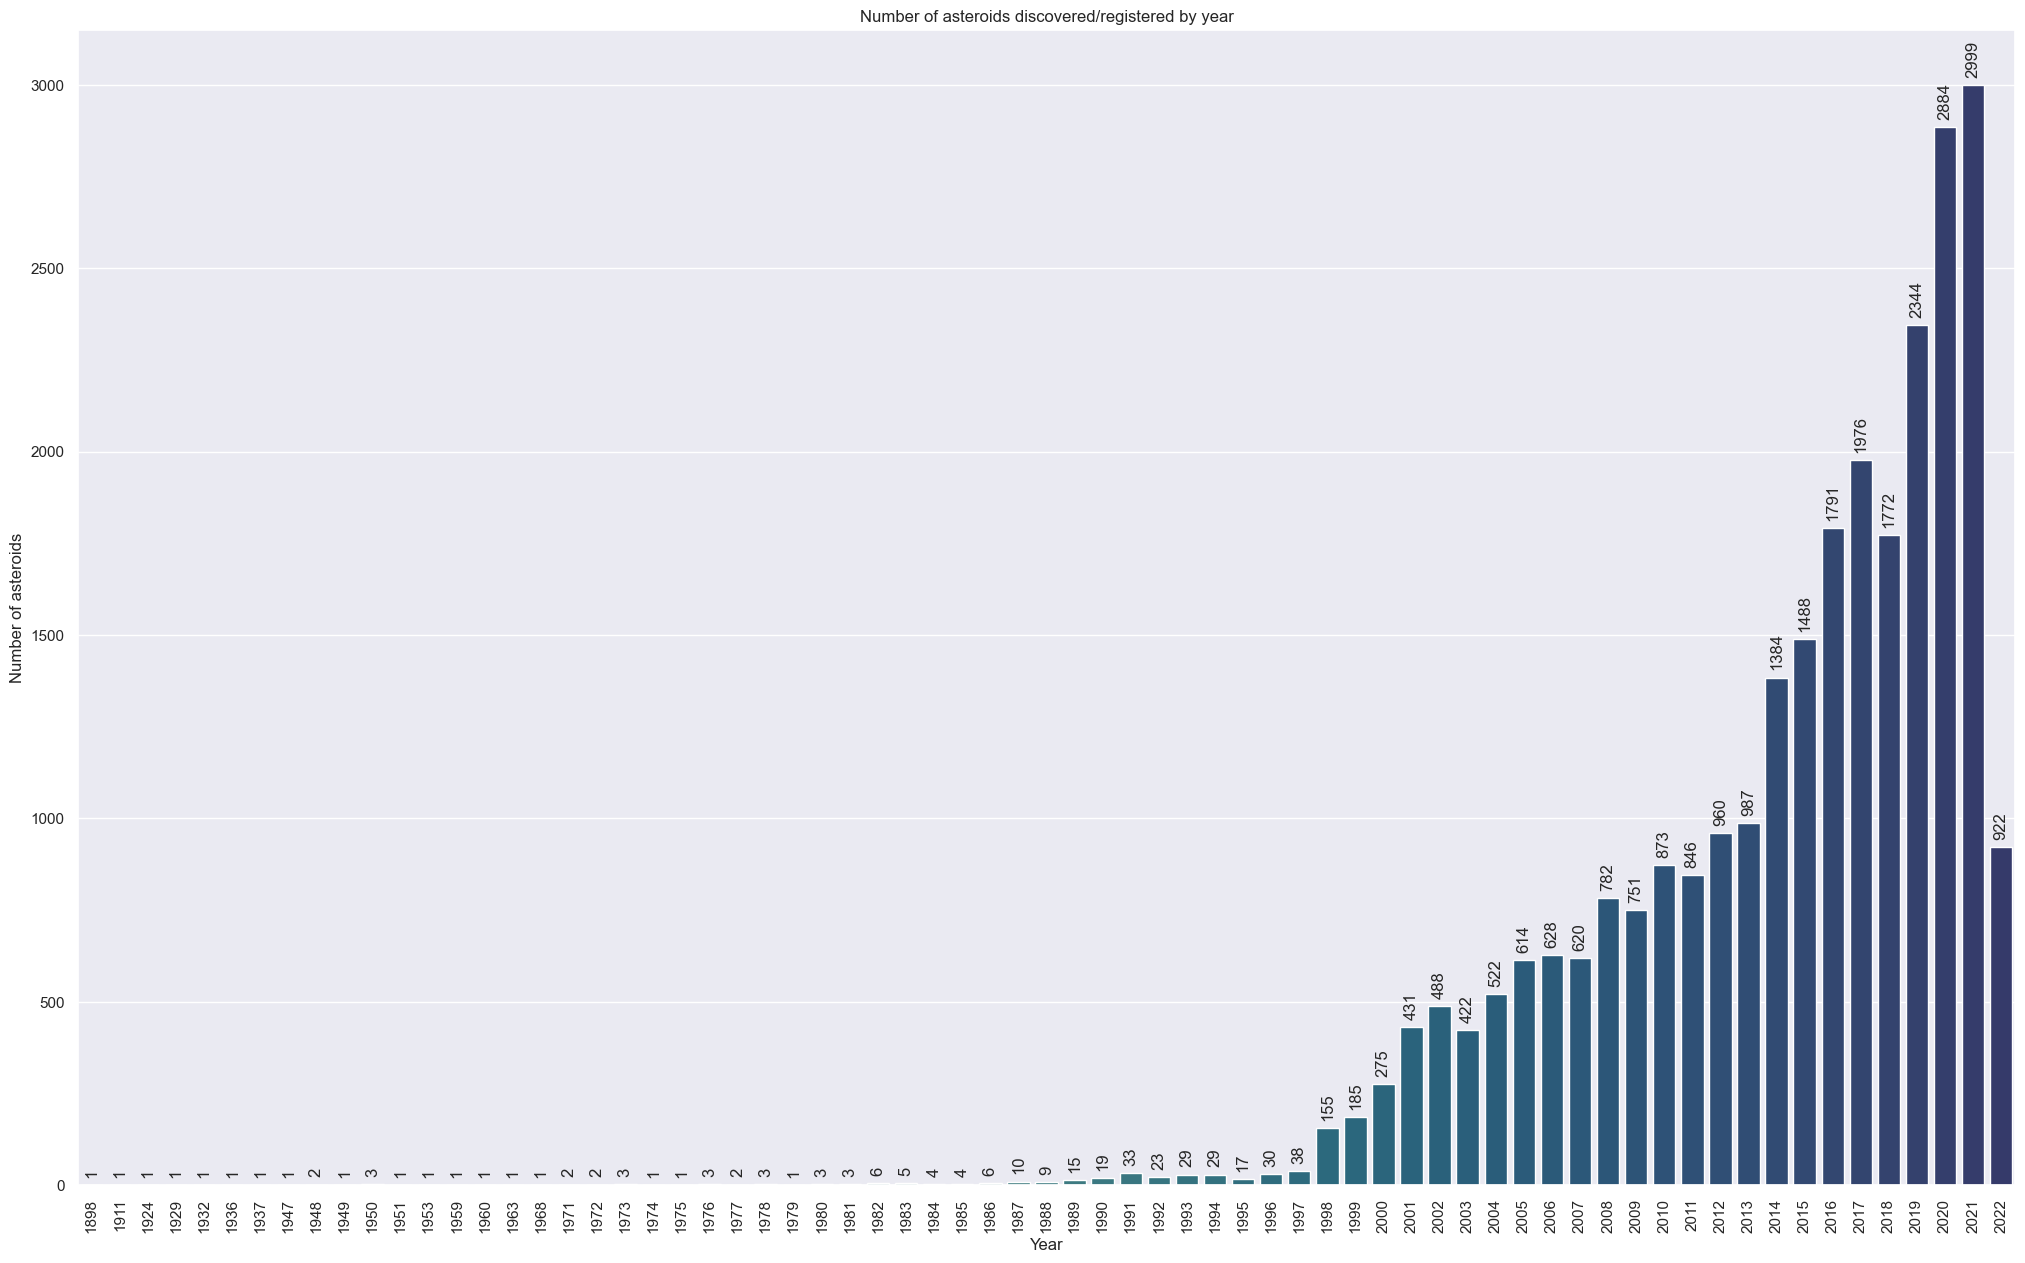

In [ ]:
plt.figure(figsize=(25,15))
asteroids = sns.barplot(data=yolo, x='Year', y='Number_of_asteroids', palette='crest')
asteroids.tick_params(axis='x', rotation=90)

plt.title('Number of asteroids discovered/registered by year')
plt.xlabel('Year')
plt.ylabel('Number of asteroids')

for index, value in enumerate(yolo['Number_of_asteroids']):
    plt.annotate(str(value), xy=(index, value + 20), ha='center', va='bottom', rotation=90)


In [ ]:
ax.tick_params(axis='x', rotation=90)

NameError: name 'ax' is not defined

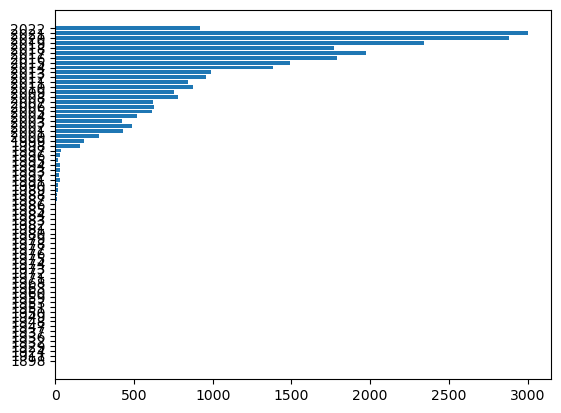

In [ ]:

plt.barh(yolo['Year'], yolo['Number_of_asteroids'])
plt.show()

In [ ]:
abberations2

['6743', '4788', '6344']

In [ ]:
abberations3

[]

In [ ]:
from collections import Counter

In [ ]:
years = Counter(splited)

In [ ]:
years

Counter({'2021': 574,
         '2020': 526,
         '2019': 482,
         '2018': 378,
         '2017': 361,
         '2016': 333,
         '2015': 261,
         '2014': 211,
         '2022': 198,
         '2013': 185,
         '2012': 161,
         '2010': 146,
         '2011': 138,
         '2008': 129,
         '2009': 117,
         '2005': 114,
         '2007': 107,
         '2004': 103,
         '2006': 102,
         '2003': 93,
         '2002': 92,
         '2001': 83,
         '2000': 70,
         '1998': 44,
         '1999': 33,
         '1996': 10,
         '1997': 9,
         '1991': 9,
         '1994': 9,
         '1989': 8,
         '1993': 6,
         '1990': 4,
         '1988': 3,
         '1992': 3,
         '1983': 2,
         '1995': 2,
         '1982': 2,
         '1984': 2,
         '1975': 1,
         '1976': 1,
         '1937': 1,
         '1981': 1,
         '1951': 1,
         '1936': 1,
         '1973': 1,
         '1987': 1,
         '1950': 1,
         '6743'

In [ ]:
abberations = []
for key in years:
    if int(key) > 2022:
        abberations.append(key)

In [ ]:
abberations

['6743']

In [ ]:
df_haz = pd.read_json('pha_extended.json')

print(df_haz.to_string())

      NEO_flag  One_km_NEO_flag  PHA_flag      H     G  Num_obs   rms    U  Arc_years Perturbers Perturbers_2    Number               Name Principal_desig      Epoch          M       Peri       Node         i         e         n          a        Ref  Num_opps  Computer Hex_flags    Last_obs            Tp  Orbital_period  Perihelion_dist  Aphelion_dist  Semilatus_rectum  Synodic_period Orbit_type            Other_desigs  Critical_list_numbered_object_flag  One_opposition_object_flag  Arc_length
0          1.0              1.0       1.0  16.58  0.15     1713  0.60    0  1949-2023        M-v          3Ek    (1566)             Icarus         1949 MA  2460400.5  344.75533   31.43692   87.95325  22.80165  0.826921  0.880486   1.078088  E2024-A55        40  MPCLINUX      9803  2023-07-15  2.460418e+06        1.119390         0.186594       1.969582          0.170446        9.375908     Apollo                     NaN                                 NaN                         NaN         NaN


In [ ]:
df_haz.shape

(2413, 38)

In [ ]:
df_haz.describe()

,NEO_flag,One_km_NEO_flag,PHA_flag,H,G,Num_obs,rms,Epoch,M,Peri,...,Num_opps,Tp,Orbital_period,Perihelion_dist,Aphelion_dist,Semilatus_rectum,Synodic_period,Critical_list_numbered_object_flag,One_opposition_object_flag,Arc_length
count,2408.0,246.0,2395.0,2413.000000,2413.000000,2413.000000,2413.000000,2.413000e+03,2413.000000,2413.000000,...,2413.000000,2.413000e+03,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,154.0,459.0,517.000000
mean,1.0,1.0,1.0,20.220269,0.149975,318.839619,0.598172,2.460396e+06,179.422648,180.610258,...,4.780356,2.460388e+06,2.578006,0.765073,2.863296,0.578792,3.910668,1.0,1.0,73.568665
std,0.0,0.0,0.0,1.405018,0.001221,642.097518,0.176987,1.143508e+02,104.499046,100.482252,...,4.521534,3.776551e+02,2.669561,0.220151,1.509607,0.158584,18.312107,0.0,0.0,70.407023
min,1.0,1.0,1.0,14.100000,0.090000,7.000000,0.010000,2.457040e+06,0.016290,0.006900,...,1.000000,2.451484e+06,0.501211,0.092871,0.956028,0.089465,1.004857,1.0,1.0,1.000000
25%,1.0,1.0,1.0,19.420000,0.150000,78.000000,0.470000,2.460400e+06,90.460870,95.502250,...,2.000000,2.460208e+06,1.517661,0.624351,1.863391,0.474205,1.417764,1.0,1.0,22.000000
50%,1.0,1.0,1.0,20.530000,0.150000,148.000000,0.620000,2.460400e+06,176.526500,182.475320,...,3.000000,2.460395e+06,2.391274,0.822288,2.766962,0.602875,1.693587,1.0,1.0,40.000000
75%,1.0,1.0,1.0,21.310000,0.150000,305.000000,0.730000,2.460400e+06,270.972060,267.024040,...,6.000000,2.460578e+06,3.372997,0.944590,3.729439,0.698018,2.714755,1.0,1.0,125.000000
max,1.0,1.0,1.0,22.000000,0.150000,10926.000000,1.500000,2.460400e+06,359.770250,359.749100,...,41.000000,2.461379e+06,95.079159,1.065169,40.714789,0.926907,564.372441,1.0,1.0,253.000000


In [ ]:
df_haz.head()

,NEO_flag,One_km_NEO_flag,PHA_flag,H,G,Num_obs,rms,U,Arc_years,Perturbers,...,Orbital_period,Perihelion_dist,Aphelion_dist,Semilatus_rectum,Synodic_period,Orbit_type,Other_desigs,Critical_list_numbered_object_flag,One_opposition_object_flag,Arc_length
0,1.0,1.0,1.0,16.58,0.15,1713,0.60,0,1949-2023,M-v,...,1.119390,0.186594,1.969582,0.170446,9.375908,Apollo,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,15.27,0.15,8200,0.47,0,1951-2024,M-v,...,1.390426,0.827789,1.663716,0.552761,3.561306,Apollo,[1983 CY3],NaN,NaN,NaN
2,1.0,1.0,1.0,16.08,0.09,3112,0.64,0,1930-2024,M-v,...,1.783314,0.647194,2.293943,0.504780,2.276626,Apollo,NaN,NaN,NaN,NaN
3,1.0,1.0,1.0,15.28,0.15,1056,0.68,0,1973-2023,M-v,...,2.367590,0.621184,2.931591,0.512573,1.731213,Apollo,NaN,NaN,NaN,NaN
4,1.0,NaN,1.0,18.72,0.15,134,0.89,0,1936-2020,M-v,...,2.565373,0.441755,3.306223,0.389687,1.638825,Apollo,NaN,NaN,NaN,NaN


In [ ]:
# df = df.drop(df[['Date', 'Location']], axis=1)
# pd.get_dummies(df, columns=['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'], dtype=float)

In [ ]:
neo = pd.read_csv("NEO Earth Close Approaches.csv")
neo.describe()
neo.head()
neo.shape
neo["Object"]
new_neo = neo.drop_duplicates(subset='Object')
new_neo.shape
neo_names = new_neo['Object'].tolist()
neo_names

In [33]:
ast.describe()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,90836.00,90836.00,90836.00,90836.00,90836.00
mean,0.13,0.28,48066.92,37066546.03,23.53
std,0.30,0.67,25293.30,22352040.60,2.89
min,0.00,0.00,203.35,6745.53,9.23
25%,0.02,0.04,28619.02,17210820.24,21.34
50%,0.05,0.11,44190.12,37846579.26,23.70
75%,0.14,0.32,62923.60,56548996.45,25.70
max,37.89,84.73,236990.13,74798651.45,33.20


In [34]:
ast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   est_diameter_min    90836 non-null  float64
 1   est_diameter_max    90836 non-null  float64
 2   relative_velocity   90836 non-null  float64
 3   miss_distance       90836 non-null  float64
 4   absolute_magnitude  90836 non-null  float64
 5   hazardous           90836 non-null  bool   
dtypes: bool(1), float64(5)
memory usage: 3.6 MB


In [35]:
ast['hazardous'] = ast['hazardous'].astype(int)

In [36]:
ast.head(5)

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.20,2.68,13569.25,54839744.08,16.73,0
1,0.27,0.59,73588.73,61438126.52,20.00,1
2,0.72,1.61,114258.69,49798724.94,17.83,0
3,0.10,0.22,24764.30,25434972.72,22.20,0
4,0.26,0.57,42737.73,46275567.00,20.09,1


In [37]:
ast["hazardous"].value_counts()

hazardous
0    81996
1     8840
Name: count, dtype: int64

deal with unbalanced data set

In [38]:
print('Fraction of positive labels in hazardous:', str(round(100*np.mean(ast['hazardous']),3)) + '%')

Fraction of positive labels in hazardous: 9.732%


c:\Users\bartb\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


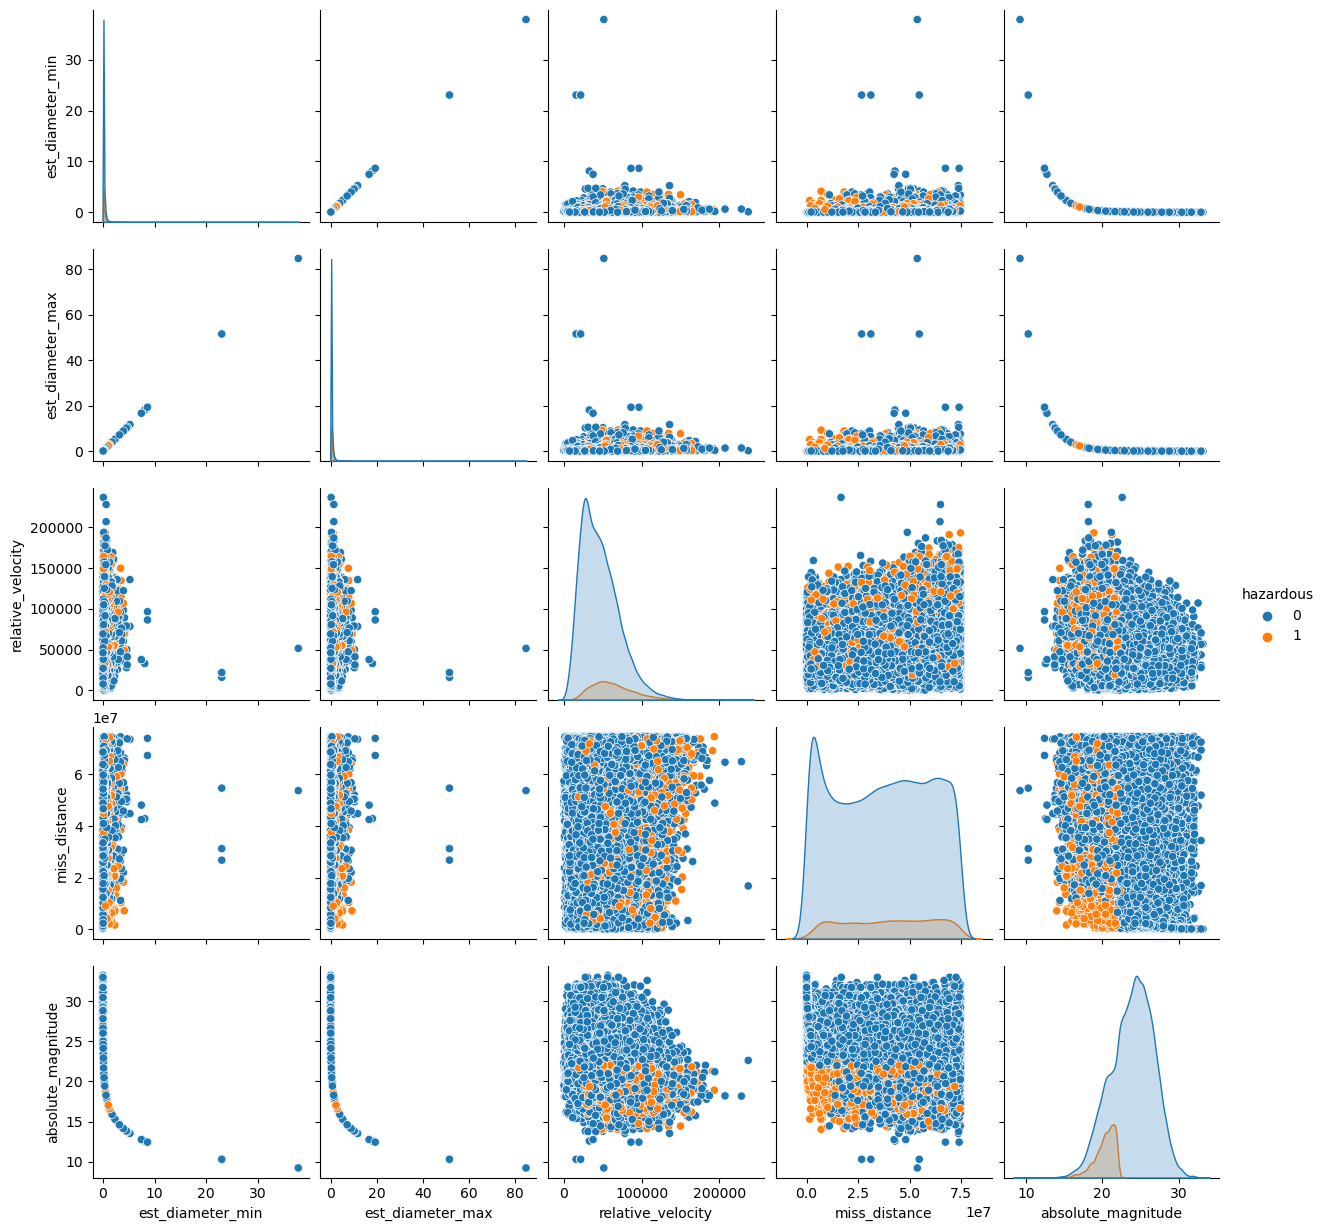

In [39]:
sns.pairplot(ast, hue = "hazardous")
plt.show()

split data

In [40]:
X = ast.drop(['hazardous'], axis = 1)

In [41]:
X

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
0,1.20,2.68,13569.25,54839744.08,16.73
1,0.27,0.59,73588.73,61438126.52,20.00
2,0.72,1.61,114258.69,49798724.94,17.83
3,0.10,0.22,24764.30,25434972.72,22.20
4,0.26,0.57,42737.73,46275567.00,20.09
...,...,...,...,...,...
90831,0.03,0.06,52078.89,12300389.18,25.00
90832,0.02,0.04,46114.61,54321206.42,26.00
90833,0.03,0.07,7566.81,28400768.16,24.60
90834,0.01,0.02,69199.15,68692060.53,27.80


In [42]:
y = ast["hazardous"]

In [43]:
y

0        0
1        1
2        0
3        0
4        1
        ..
90831    0
90832    0
90833    0
90834    0
90835    0
Name: hazardous, Length: 90836, dtype: int32

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
y_train.value_counts()

hazardous
0    65596
1     7072
Name: count, dtype: int64

In [ ]:
y_test.value_counts()

hazardous
0    16400
1     1768
Name: count, dtype: int64

In [ ]:
y_train.value_counts() / y_train.count()

hazardous
0   0.90
1   0.10
Name: count, dtype: float64

In [ ]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [ ]:
y_train_res.value_counts()

hazardous
0    65596
1    65596
Name: count, dtype: int64

In [ ]:
y_train_res.value_counts() / y_train_res.count()

hazardous
0   0.50
1   0.50
Name: count, dtype: float64

In [ ]:
# #tetrachoric correlation
# def tetrachoric_corr(df, feature):
#     # Utworzenie tablicy korelacyjnej (ang. contingency table):
#     contingency_table = pd.crosstab(df['DEAD'], df[feature])

#     # wyciągnicie wartości z tablicy korelacyjnej:
#     a = contingency_table.iloc[0,0]
#     b = contingency_table.iloc[0,1]
#     c = contingency_table.iloc[1,0]
#     d = contingency_table.iloc[1,1]

#     # obliczenie wsółczynnika:
#     tet_corr = math.cos(math.pi / (1 + math.sqrt(a*d /b/c)))
#     # print(contingency_table)
#     return round(tet_corr,2)

models

In [51]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

In [46]:
#the best
a_j_frost = XGBClassifier(objective='binary:logistic', scale_pos_weight=30, max_depth=3, learning_rate=0.1, n_estimators=50)

In [47]:
a_j_frost.fit(X_train, y_train)
a_j_frost_pred = a_j_frost.predict(X_test)

# ConfusionMatrixDisplay.from_predictions(y_test,xgb_pred)
print(classification_report(y_test,a_j_frost_pred))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86     16400
           1       0.30      1.00      0.46      1768

    accuracy                           0.77     18168
   macro avg       0.65      0.87      0.66     18168
weighted avg       0.93      0.77      0.82     18168



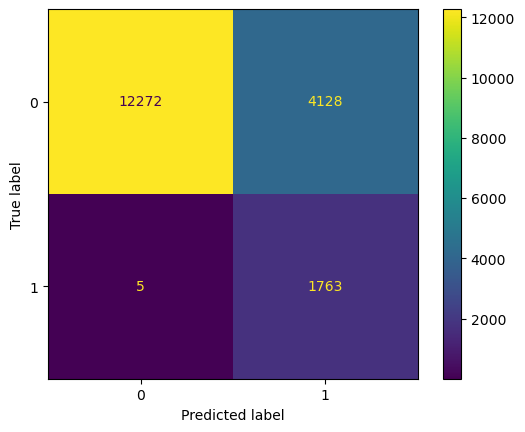

In [48]:
ConfusionMatrixDisplay.from_predictions(y_test,a_j_frost_pred)

In [52]:
# Get prediction probabilities
y_prob = a_j_frost.predict_proba(X_test)[:, 1]

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Find the threshold that maximizes the F1 score
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]

# Use the new threshold for classification
y_pred_adjusted = (y_prob >= best_threshold).astype(int)

# Print classification report
print(classification_report(y_test, y_pred_adjusted))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90     16400
           1       0.35      0.84      0.49      1768

    accuracy                           0.83     18168
   macro avg       0.66      0.83      0.69     18168
weighted avg       0.92      0.83      0.86     18168



In [ ]:
#logistic regression
lr = LogisticRegression(class_weight=)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_acc = round(accuracy_score(lr_pred, y_test)*100, 3)
print(lr_acc)
ConfusionMatrixDisplay.from_predictions(y_test,)

90.357


In [ ]:
#k-nearest neighbors
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_acc = round(accuracy_score(knn_pred, y_test)*100, 3)
print(knn_acc)

89.718


In [ ]:
#decision tree
class_weight = {0: 1, 1: 10}
dtc = DecisionTreeClassifier(class_weight=class_weight)
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)
dtc_acc = round(accuracy_score(dtc_pred, y_test)*100, 3)
print(dtc_acc)


89.537


In [ ]:
#random forest
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

# ConfusionMatrixDisplay.from_predictions(y_test,xgb_pred)
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     16400
           1       0.60      0.42      0.49      1768

    accuracy                           0.92     18168
   macro avg       0.77      0.69      0.72     18168
weighted avg       0.91      0.92      0.91     18168



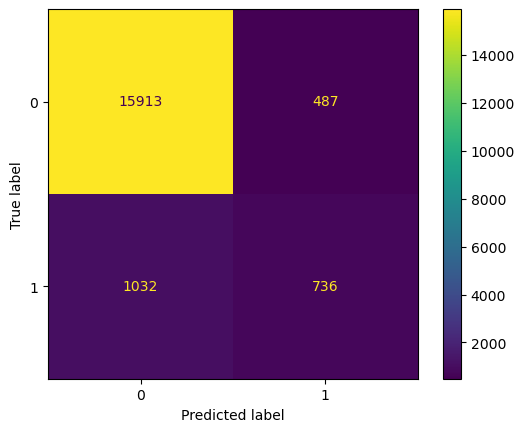

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,rfc_pred)

In [ ]:
#random forest with class_weight = balanced
rfc_b = RandomForestClassifier(class_weight = 'balanced')
rfc_b.fit(X_train, y_train)
rfc_b_pred = rfc_b.predict(X_test)

# ConfusionMatrixDisplay.from_predictions(y_test,xgb_pred)
print(classification_report(y_test,rfc_b_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96     16400
           1       0.62      0.40      0.49      1768

    accuracy                           0.92     18168
   macro avg       0.78      0.69      0.72     18168
weighted avg       0.91      0.92      0.91     18168



              precision    recall  f1-score   support

           0       1.00      0.78      0.87     16400
           1       0.32      0.97      0.48      1768

    accuracy                           0.80     18168
   macro avg       0.66      0.87      0.68     18168
weighted avg       0.93      0.80      0.84     18168



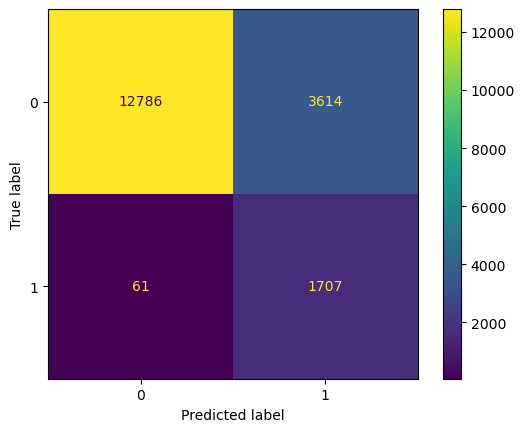

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=4, bootstrap=True, random_state=1)
rf_classifier.fit(X_train_res, y_train_res)
rf_classifier_pred = rf_classifier.predict(X_test)

# ConfusionMatrixDisplay.from_predictions(y_test,xgb_pred)
print(classification_report(y_test,rf_classifier_pred))
ConfusionMatrixDisplay.from_predictions(y_test,rf_classifier_pred)

In [ ]:
rf_classifier_1 = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=8, bootstrap=True, random_state=1, class_weight = 'balanced')
rf_classifier_1.fit(X_train, y_train)
rf_classifier_pred_1 = rf_classifier_1.predict(X_test)

# ConfusionMatrixDisplay.from_predictions(y_test,xgb_pred)
print(classification_report(y_test,rf_classifier_pred_1))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87     16400
           1       0.32      0.99      0.48      1768

    accuracy                           0.79     18168
   macro avg       0.66      0.88      0.68     18168
weighted avg       0.93      0.79      0.83     18168



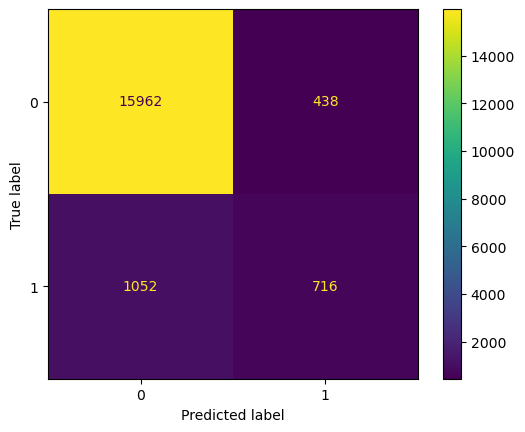

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,rfc_b_pred)

In [ ]:
weight = 65596/7072
weight

9.275452488687783

In [ ]:
#random forest with class_weight = calculated param
rfc_c = RandomForestClassifier(class_weight = {0:1, 1:weight})
rfc_c.fit(X_train, y_train)
rfc_c_pred = rfc_c.predict(X_test)

# ConfusionMatrixDisplay.from_predictions(y_test,xgb_pred)
print(classification_report(y_test,rfc_c_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96     16400
           1       0.62      0.39      0.48      1768

    accuracy                           0.92     18168
   macro avg       0.78      0.68      0.72     18168
weighted avg       0.91      0.92      0.91     18168



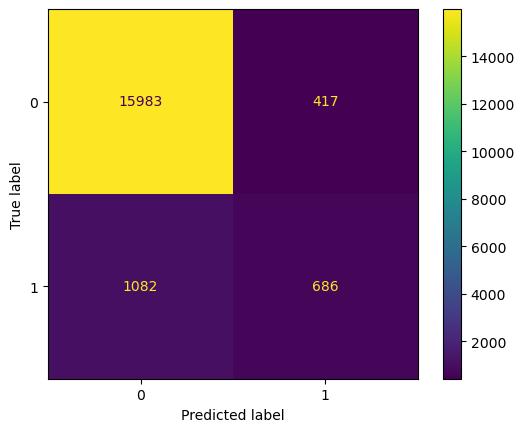

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,rfc_c_pred)

In [ ]:
#random forest on smote data
rfc_res = RandomForestClassifier()
rfc_res.fit(X_train_res, y_train_res)
rfc_res_pred = rfc_res.predict(X_test)

# ConfusionMatrixDisplay.from_predictions(y_test,xgb_pred)
print(classification_report(y_test,rfc_res_pred))

NameError: name 'RandomForestClassifier' is not defined

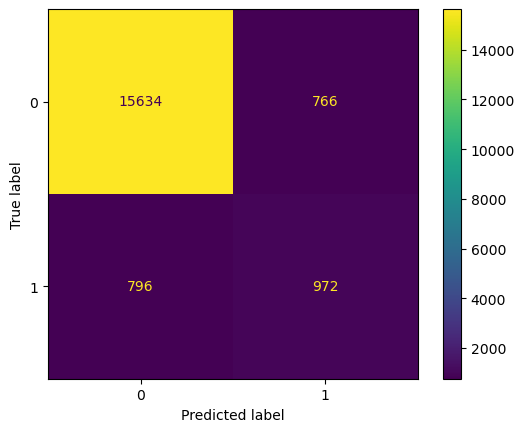

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,rfc_res_pred)

In [ ]:
#gaussian naive bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
gnb_acc = round(accuracy_score(gnb_pred, y_test)*100, 3)
print(gnb_acc)

90.103


In [ ]:
#xg boost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

# ConfusionMatrixDisplay.from_predictions(y_test,xgb_pred)
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     16400
           1       0.68      0.25      0.37      1768

    accuracy                           0.92     18168
   macro avg       0.80      0.62      0.66     18168
weighted avg       0.90      0.92      0.90     18168



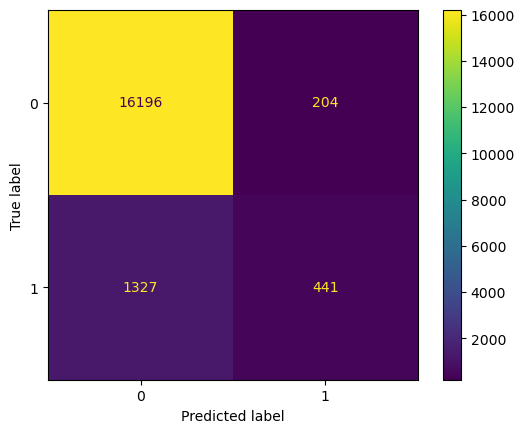

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,xgb_pred)

In [ ]:
#xg boost with 
xgb_res = XGBClassifier()
xgb_res.fit(X_train_res, y_train_res)
xgb_res_pred = xgb_res.predict(X_test)

# ConfusionMatrixDisplay.from_predictions(y_test,xgb_pred)
print(classification_report(y_test,xgb_res_pred))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92     16400
           1       0.39      0.67      0.49      1768

    accuracy                           0.86     18168
   macro avg       0.67      0.78      0.71     18168
weighted avg       0.91      0.86      0.88     18168



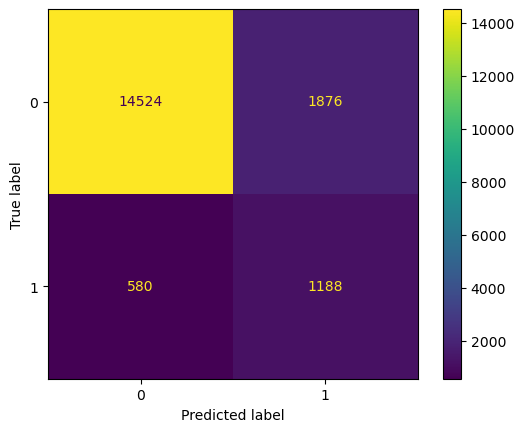

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,xgb_res_pred)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score



In [ ]:
precision = precision_score(y_test, xgb_res_pred, average='binary')
recall = recall_score(y_test, xgb_res_pred, average='binary')
f1 = f1_score(y_test, xgb_res_pred, average='binary')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.3877284595300261
Recall: 0.6719457013574661
F1 Score: 0.4917218543046358


In [ ]:
parameters = {'learning_rate':[0.01, 0.1, 1, 2, 5], # 
              'gamma':[0.001, 0.01, 0.1, 1, 2, 10], # przetestuj różne wartości parametru gamma dla jądra rbf
              'n_estimators': [10,20,30,50,100], # przetestuj różne wartości parametru jądra sigmoid
              'max_depth':[3,6,9,12]} # przetestuj różne wartości hiperparametru 

gs_xgb = GridSearchCV(xgb,param_grid=parameters,scoring="accuracy")


In [ ]:
xgb.fit(X_train,y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'gamma': [0.001, 0.01, 0.1, 1, 2, 10],
                         'learning_rate': [0.01, 0.1, 1, 2, 5],
                         'max_depth': [3, 6, 9, 12],
                         'n_estimators': [10, 20, 30, 50, 100]},
             scoring='accuracy')

In [ ]:

ConfusionMatrixDisplay.from_predictions(y_test,yp)

yp = clf.predict(X_test)
print(classification_report(y_test,yp))

In [ ]:
#sgdc
sgdc = SGDClassifier()
sgdc.fit(X_train, y_train)
sgdc_pred = sgdc.predict(X_test)
sgdc_acc = round(accuracy_score(sgdc_pred, y_test)*100, 3)
print(sgdc_acc)

89.278


In [ ]:
#svm
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_acc = round(accuracy_score(svm_pred, y_test)*100, 3)
print(svm_acc)

In [ ]:


confusion_matrix(train_y, pred_train)
roc_auc_score(test_y, pred_test_proba)
from sklearn.metrics import RocCurveDisplay, roc_curve
RocCurveDisplay.from_predictions(train_y, pred_train_proba)

In [ ]:
RocCurveDisplay.from_predictions(test_y, pred_test_proba)